In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import statsmodels.tsa.seasonal as tsa

data = pd.read_csv("../data/processed/csv/input.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [2]:
descriptive_statistics = data.describe()
descriptive_statistics.to_csv("files/descriptive_statistics.csv")
descriptive_statistics

,Open,High,Low,Close,Adj Close,Volume,UNRATE,FEDFUNDS,GDP_GROWTH,CSI,VIX,EMA12,EMA3,MACD,VWMA,RSI,STOCH
count,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1619.872579,1675.398178,1563.091469,1629.994834,1629.994834,5.321073e+10,0.057661,0.026012,0.024895,0.857600,19.544051,1573.826351,1619.197727,45.371375,1569.685009,0.620103,0.730484
std,1079.549718,1118.222403,1039.986196,1087.268036,1087.268036,3.703155e+10,0.017773,0.022003,0.019425,0.133548,7.794238,1036.389411,1076.573480,95.422564,1034.744078,0.137622,0.221892
min,343.910004,370.959991,340.369995,367.070007,367.070007,3.258730e+09,0.034000,0.000500,-0.075285,0.500000,9.450000,339.017884,350.505392,-276.828258,337.893234,0.159611,0.133515
25%,950.785004,984.684998,891.100006,954.855011,954.855011,1.632610e+10,0.044000,0.001850,0.017936,0.761000,13.880000,974.821566,947.415790,10.992750,940.418858,0.538374,0.607723
50%,1282.709961,1318.160034,1249.050049,1282.829956,1282.829956,6.303151e+10,0.054000,0.021300,0.025595,0.884000,17.700000,1257.370531,1287.647231,44.124209,1268.599935,0.639445,0.818454
75%,2067.084961,2111.854981,1997.135010,2067.724976,2067.724976,8.103464e+10,0.067000,0.050050,0.035765,0.955000,22.870000,2020.796046,2051.461098,86.329376,2031.295034,0.715666,0.902255
max,4778.140137,4818.620117,4560.000000,4769.830078,4769.830078,1.621854e+11,0.148000,0.065400,0.119503,1.120000,68.510000,4367.835783,4645.435266,421.069531,4441.457125,0.901028,0.978481


In [3]:
cols = ['Adj Close', 'UNRATE', 'FEDFUNDS', 'GDP_GROWTH', 'Volume']
labels = ['Adjusted Close Price', 'Unemployment Rate', 'Federal Funds Rate', 'GDP Growth (%)']
macro = data.loc[:, cols]

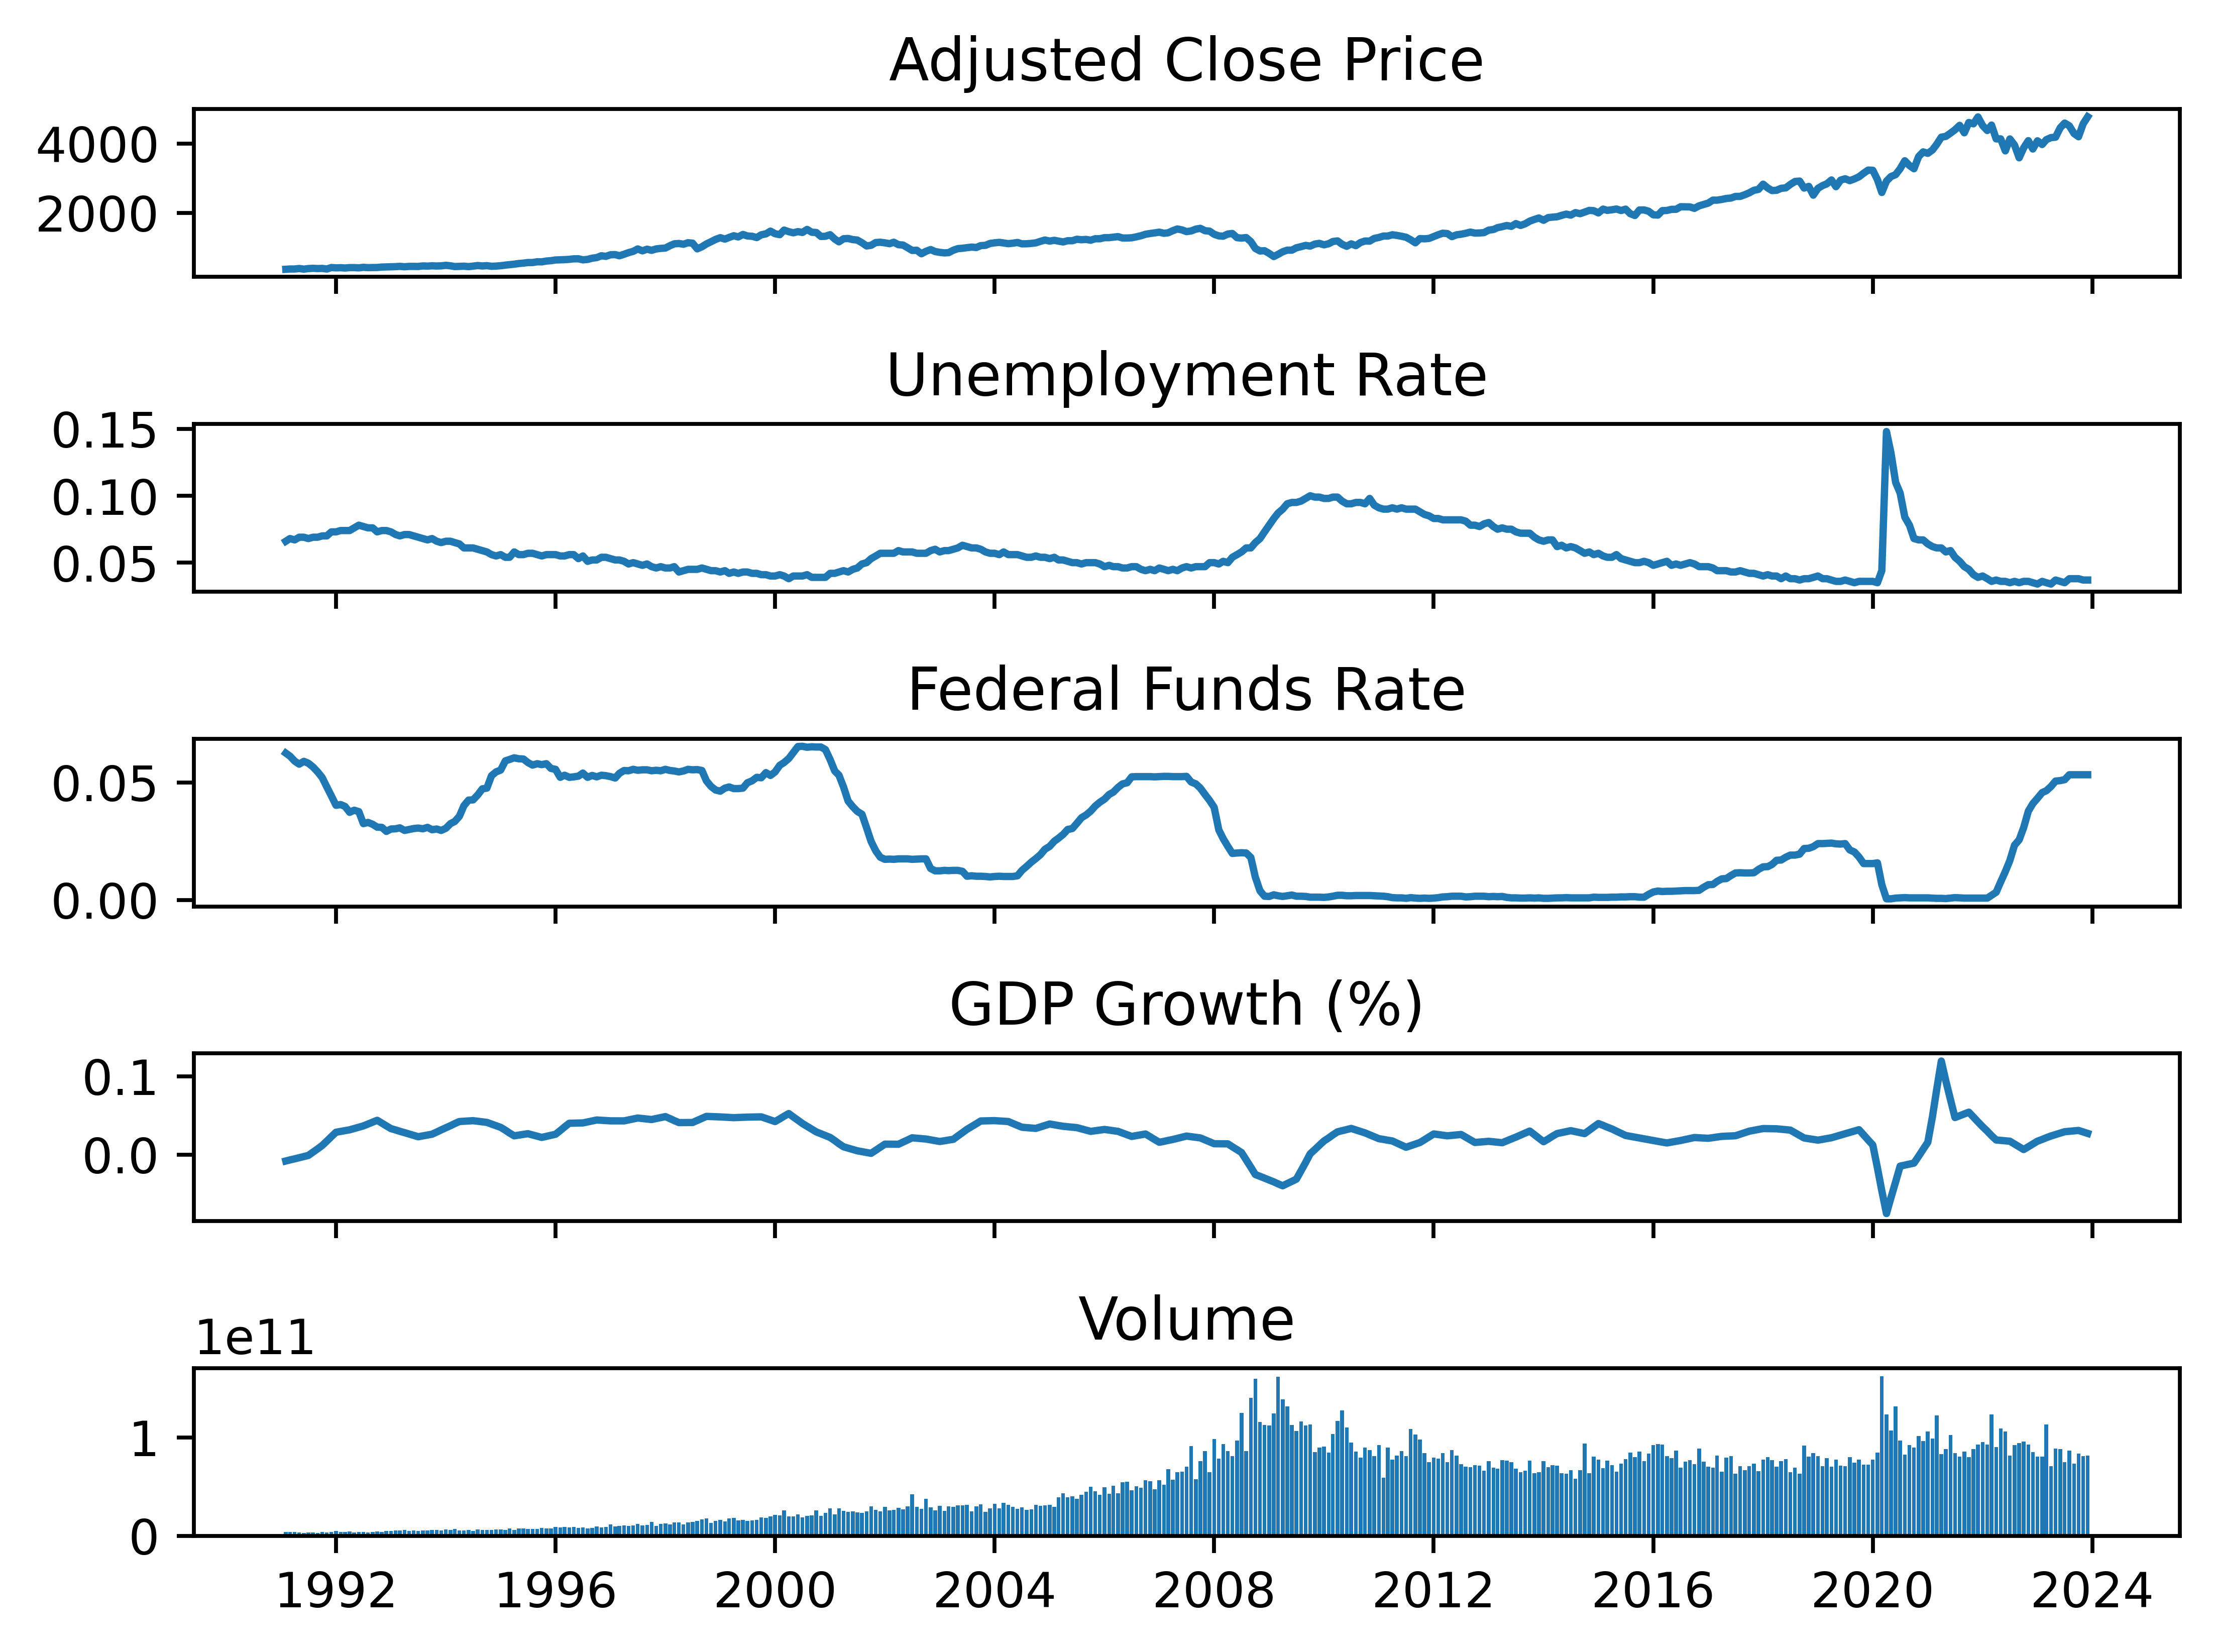

In [4]:
fig, ax = plt.subplots(5, sharex=True)
for i in range(4):
    ax[i].plot(macro.iloc[:,i])
    ax[i].set_title(labels[i])
ax[4].bar(macro.index, macro['Volume'], width = 25)
ax[4].set_title('Volume')
fig.set_dpi(700)
fig.tight_layout()
fig.savefig("files/macro_plot.png")

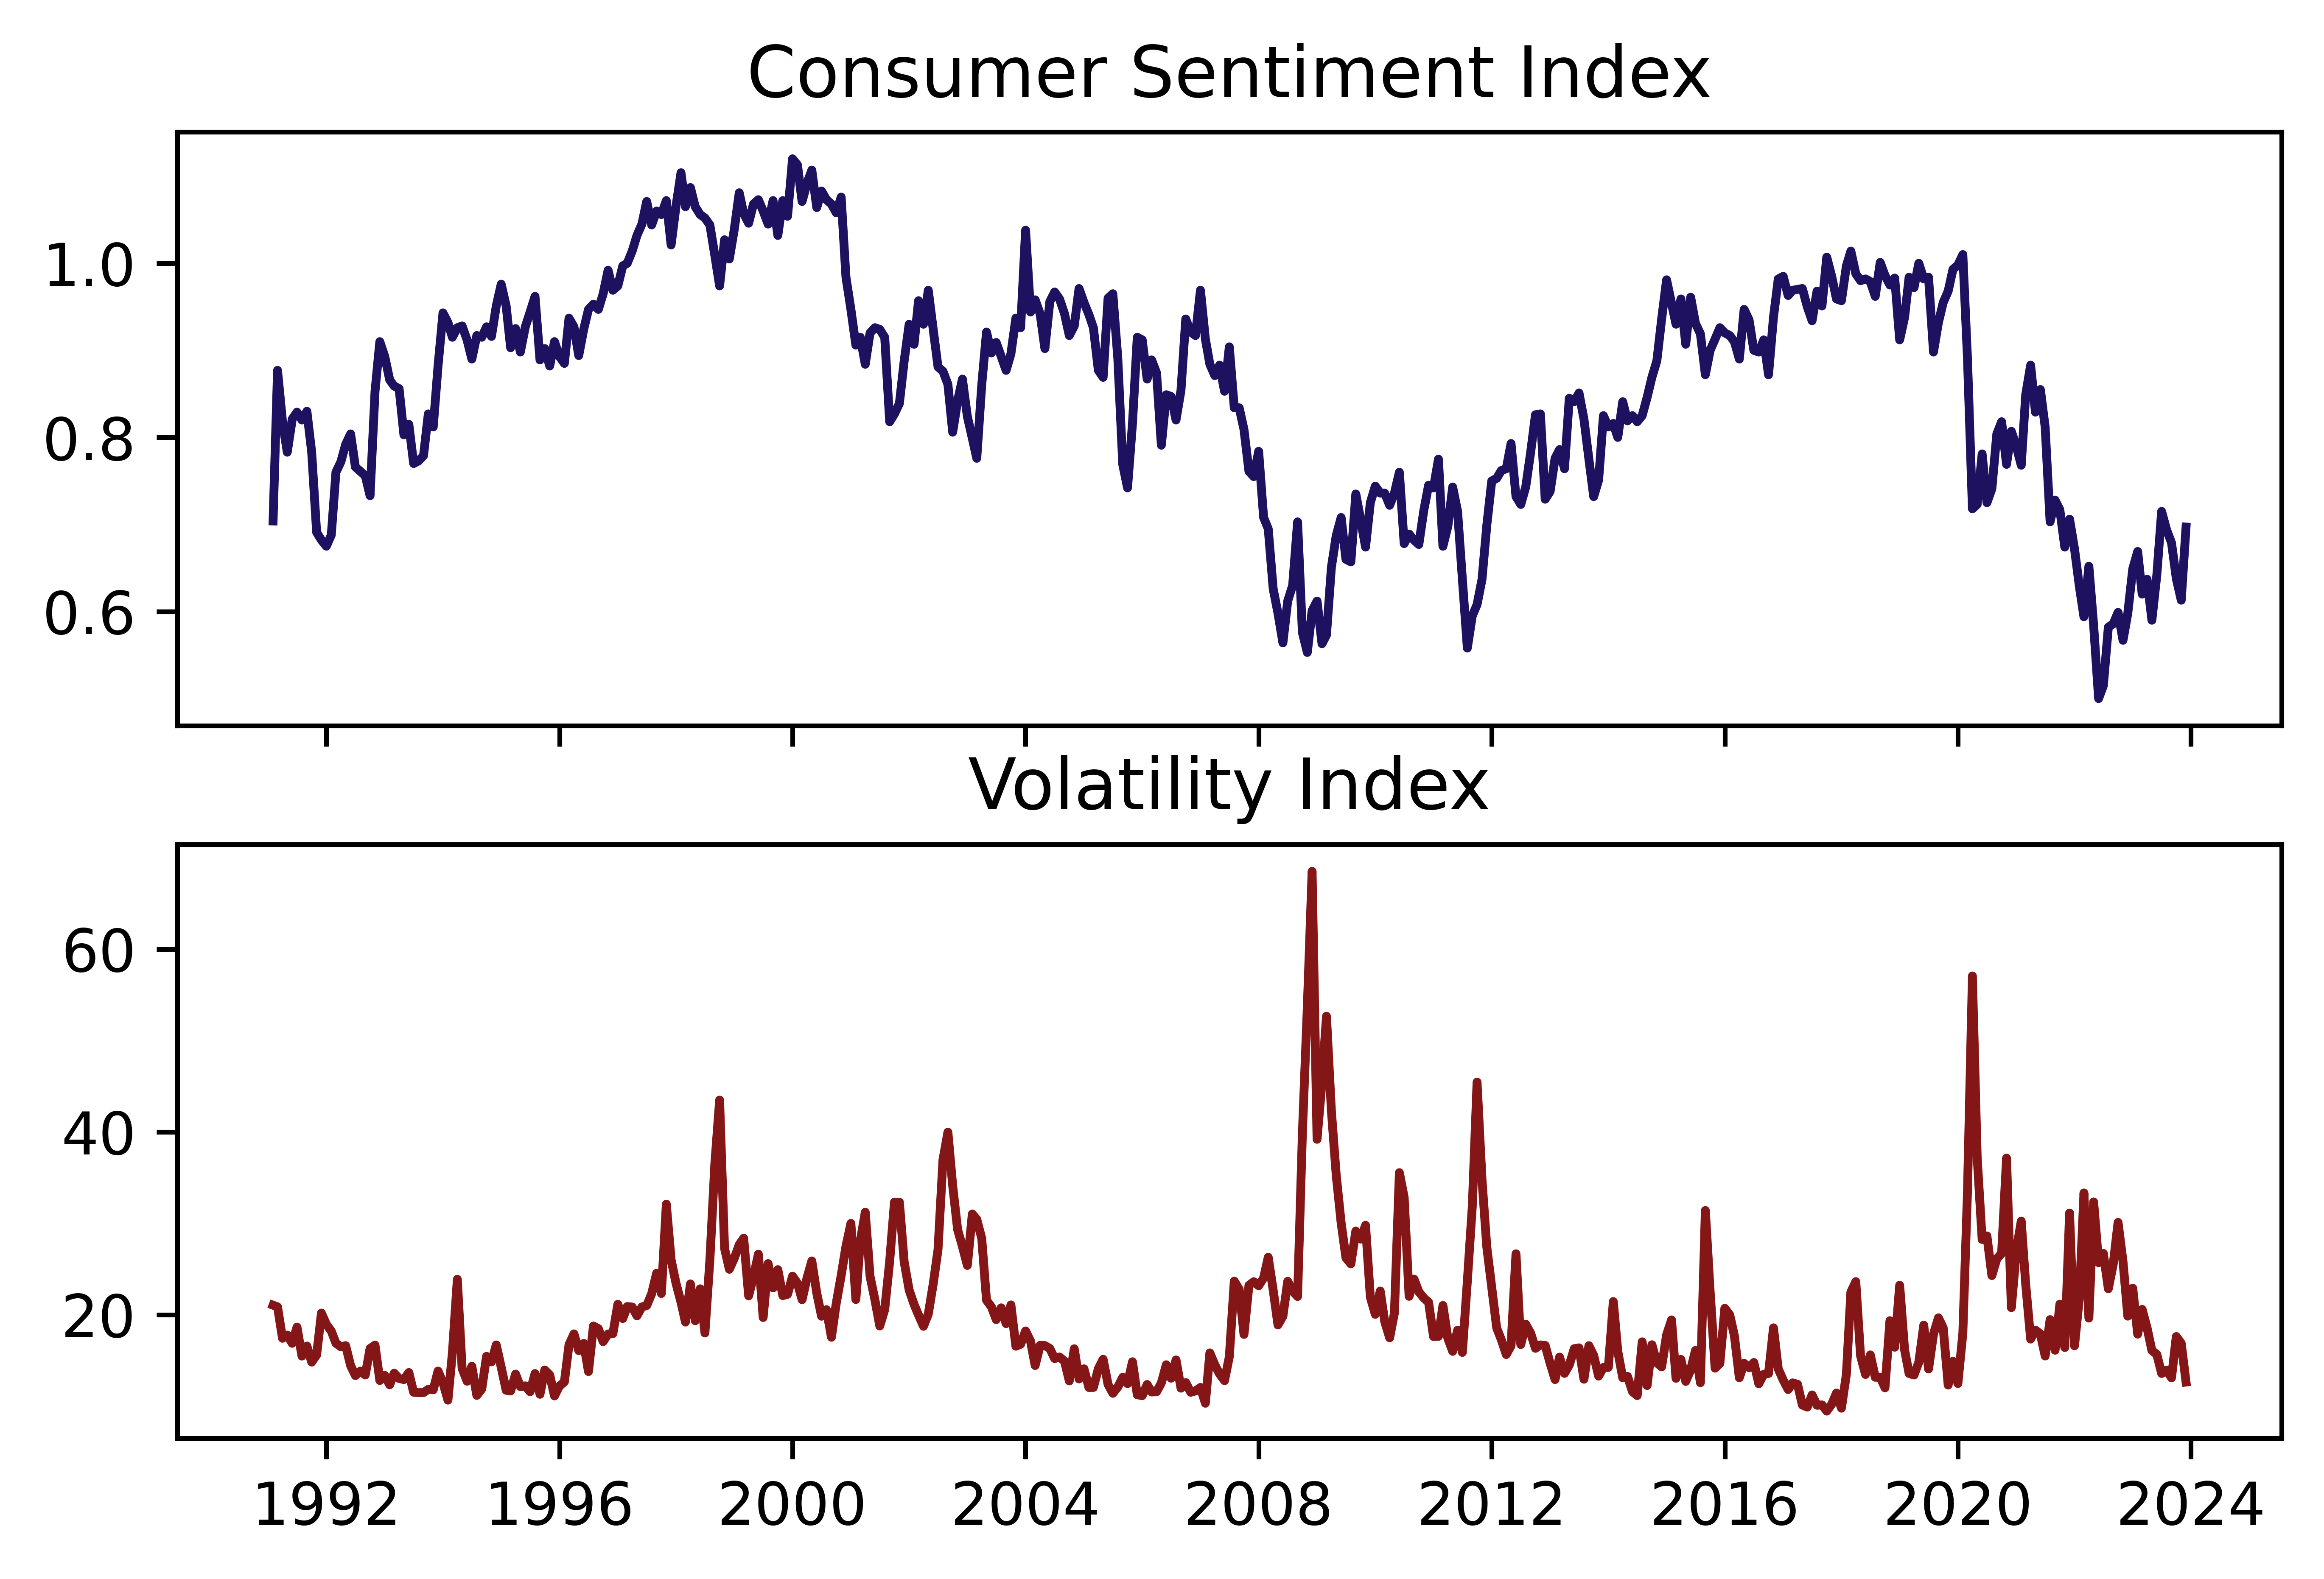

In [5]:
fig, ax = plt.subplots(2, sharex=True)
ax[1].plot(data['VIX'], color = '#841617')
ax[1].set_title('Volatility Index')
ax[0].plot(data['CSI'], color = '#1d1160')
ax[0].set_title('Consumer Sentiment Index')
fig.set_figheight(4)
fig.set_dpi(1000)
fig.savefig("files/sentiment_plot.png")

In [6]:
cols = ['Adj Close','Volume','EMA12','EMA3','MACD','VWMA','RSI','STOCH']
end_date = max(data.index)
end_date
start_date = end_date - timedelta(days= 1826)
technicals = data.loc[start_date:end_date, cols]

In [7]:
fig, ax = plt.subplots(4, sharex=True)
ax[0].set_title('Moving Averages')
ax[0].plot(technicals['Adj Close'], label = 'Close', linewidth = 1.5)
ax[0].plot(technicals['EMA12'], label = 'Exponential MA 12', linewidth = 0.9, color = '#EF4040')
ax[0].plot(technicals['EMA3'], label = 'Exponential MA 3', linewidth = 0.9, color = '#C21292')
ax[0].plot(technicals['VWMA'], label = 'Volume Weighted MA', linewidth = 0.9, color = '#FFA732')
ax[1].set_title('Momentum')
ax[1].axhline(0.7, color = 'r', linestyle = ':')
ax[1].axhline(0.3, color = 'g', linestyle = ':')
ax[1].yaxis.set_ticks([0.3,0.5,0.7])
ax[1].plot(technicals['RSI'], label = 'RSI', color = "#891652", linewidth = 1)
ax[1].plot(technicals['STOCH'], label = 'Stochastic Oscillator', color = '#96E9C6', linewidth= 1)
ax[2].set_title('MACD')
ax[2].bar(technicals.index, technicals['MACD'].where(technicals['MACD']> 0), width = 25, color = '#18A558')
ax[2].bar(technicals.index, technicals['MACD'].where(technicals['MACD']< 0), width = 25, color = '#FF5765')
ax[3].set_title('Volume')
ax[3].bar(technicals.index, technicals['Volume'], width = 25)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.8))
fig.set_figheight(10)
fig.set_dpi(1000)
fig.tight_layout()
fig.autofmt_xdate(rotation=45)
fig.savefig('files/technicals_plot.png')

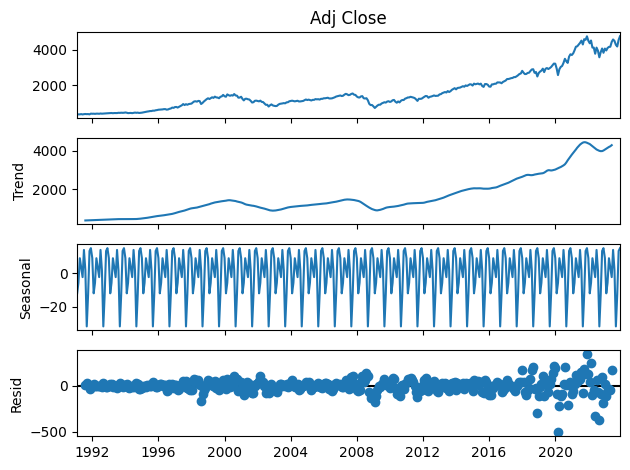

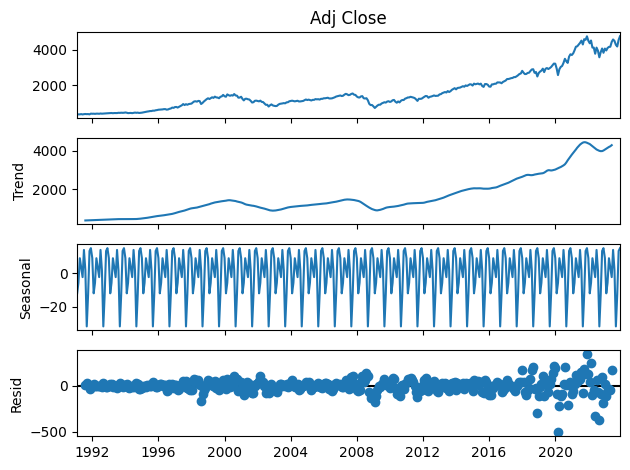

In [8]:
decomposed = tsa.seasonal_decompose(data['Adj Close'], model='additive')
fig1 = decomposed.plot()
fig1

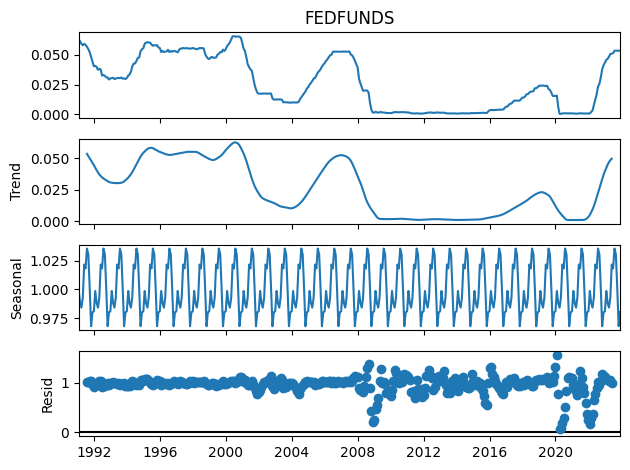

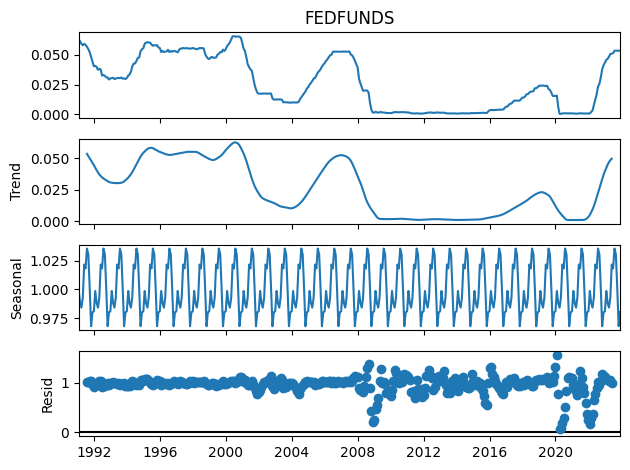

In [9]:
decomposed = tsa.seasonal_decompose(data['FEDFUNDS'], model='multiplicative')
fig2 = decomposed.plot()
fig2

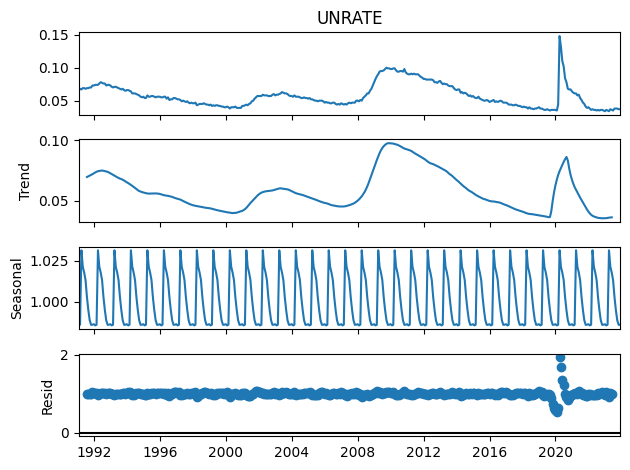

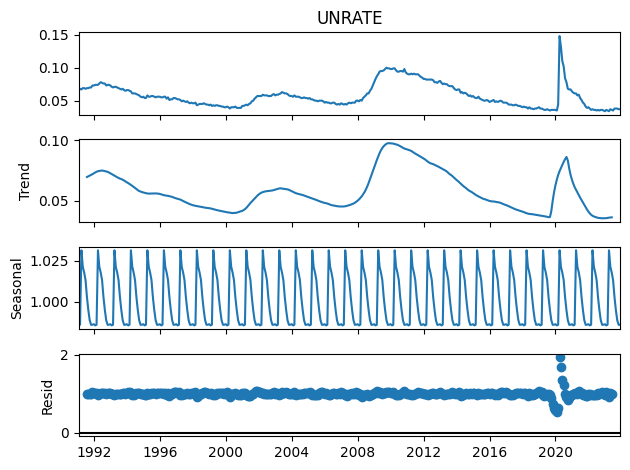

In [10]:
decomposed = tsa.seasonal_decompose(data['UNRATE'], model='multiplicative')
fig3 = decomposed.plot()
fig3